# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
weather_api_key = '2241084a99de1544d401e6bab0b793e3'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cit = cities
units = 'Imperial'
counts = 1

city_df = pd.DataFrame()

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""


#or cit,row in city_df.iterrows():
for cit in cities:    
    
    query_url = url + "appid=" + weather_api_key + "&q=" + cit + "&units=" + units
    weather = requests.get(query_url)
    weatherjson = weather.json()
       
    try:
        country = weatherjson['sys']['country']
        city_df.loc[cit,'Country'] = country
    except:
        city_df.loc[cit,'Country'] = ""
    
    try:
        max_temp = weatherjson['main']['temp_max']
        city_df.loc[cit,'Max Temp'] = max_temp
    except:
        city_df.loc[cit,'Max Temp'] = ""
    
    try:
        clouds = weatherjson['clouds']['all']
        city_df.loc[cit,'Cloudiness'] = clouds
    except:
        city_df.loc[cit,'Cloudiness'] = ""
    
    try:
        windspeed = weatherjson['wind']['speed']
        city_df.loc[cit,'Wind Speed'] = windspeed
    except:
        city_df.loc[cit,'Wind Speed'] = ""
    
    try:
        humidity = weatherjson['main']['humidity']
        city_df.loc[cit,'Humidity'] = humidity
    except:
        city_df.loc[cit,'Humidity'] = ""
    
    try:
        lat = weatherjson['coord']['lat']
        city_df.loc[cit,'Lat'] = lat
    except:
        city_df.loc[cit,'Lat'] = ""
    
    try:
        lon = weatherjson['coord']['lon']
        city_df.loc[cit,'Lng'] = lon
    except:
        city_df.loc[cit,'Lng'] = ""
    
    print(f'The city is {cit}. This is city {counts} of {len(cities)}')
    counts = counts + 1 
    

The city is saskylakh. This is city 1 of 617
The city is tura. This is city 2 of 617
The city is atuona. This is city 3 of 617
The city is moose factory. This is city 4 of 617
The city is rikitea. This is city 5 of 617
The city is tuktoyaktuk. This is city 6 of 617
The city is saint-augustin. This is city 7 of 617
The city is mataura. This is city 8 of 617
The city is parabel. This is city 9 of 617
The city is new norfolk. This is city 10 of 617
The city is ushuaia. This is city 11 of 617
The city is ibresi. This is city 12 of 617
The city is makakilo city. This is city 13 of 617
The city is cidreira. This is city 14 of 617
The city is bluff. This is city 15 of 617
The city is puerto ayora. This is city 16 of 617
The city is bredasdorp. This is city 17 of 617
The city is carinhanha. This is city 18 of 617
The city is port hedland. This is city 19 of 617
The city is weihe. This is city 20 of 617
The city is butaritari. This is city 21 of 617
The city is carnarvon. This is city 22 of 617

The city is ternate. This is city 179 of 617
The city is richards bay. This is city 180 of 617
The city is pyaozerskiy. This is city 181 of 617
The city is mumford. This is city 182 of 617
The city is kirovsk. This is city 183 of 617
The city is kavaratti. This is city 184 of 617
The city is sept-iles. This is city 185 of 617
The city is kodinsk. This is city 186 of 617
The city is touros. This is city 187 of 617
The city is fortuna. This is city 188 of 617
The city is yueyang. This is city 189 of 617
The city is itoman. This is city 190 of 617
The city is tymovskoye. This is city 191 of 617
The city is atkinson. This is city 192 of 617
The city is hobyo. This is city 193 of 617
The city is kahului. This is city 194 of 617
The city is san pedro. This is city 195 of 617
The city is skelleftea. This is city 196 of 617
The city is myitkyina. This is city 197 of 617
The city is kaitangata. This is city 198 of 617
The city is anloga. This is city 199 of 617
The city is tasiilaq. This is cit

The city is coihueco. This is city 357 of 617
The city is lavumisa. This is city 358 of 617
The city is west fargo. This is city 359 of 617
The city is gangotri. This is city 360 of 617
The city is enshi. This is city 361 of 617
The city is sidi ali. This is city 362 of 617
The city is namibe. This is city 363 of 617
The city is payo. This is city 364 of 617
The city is honiara. This is city 365 of 617
The city is itainopolis. This is city 366 of 617
The city is yangambi. This is city 367 of 617
The city is fremont. This is city 368 of 617
The city is garowe. This is city 369 of 617
The city is bubaque. This is city 370 of 617
The city is gornyak. This is city 371 of 617
The city is karema. This is city 372 of 617
The city is airai. This is city 373 of 617
The city is jacareacanga. This is city 374 of 617
The city is walvis bay. This is city 375 of 617
The city is zeya. This is city 376 of 617
The city is poso. This is city 377 of 617
The city is abha. This is city 378 of 617
The city 

The city is luwuk. This is city 535 of 617
The city is kuching. This is city 536 of 617
The city is mtambile. This is city 537 of 617
The city is sahrak. This is city 538 of 617
The city is seoul. This is city 539 of 617
The city is cap malheureux. This is city 540 of 617
The city is coari. This is city 541 of 617
The city is tocopilla. This is city 542 of 617
The city is lastoursville. This is city 543 of 617
The city is wheatley. This is city 544 of 617
The city is ixtapa. This is city 545 of 617
The city is boca do acre. This is city 546 of 617
The city is waingapu. This is city 547 of 617
The city is cockburn town. This is city 548 of 617
The city is dinga. This is city 549 of 617
The city is lunavada. This is city 550 of 617
The city is ghanzi. This is city 551 of 617
The city is simpang. This is city 552 of 617
The city is hit. This is city 553 of 617
The city is nampula. This is city 554 of 617
The city is mogok. This is city 555 of 617
The city is kachug. This is city 556 of 61

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df.to_csv("../output_data/cities.csv",index = True)
city_df.head()

,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
saskylakh,98.0,RU,91.0,71.92,114.08,0.18,20.00
tura,0.0,IN,30.0,25.52,90.22,82.89,2.48
atuona,4.0,PF,75.0,-9.80,-139.03,82.27,11.63
moose factory,1.0,CA,77.0,51.26,-80.61,5.00,5.82
rikitea,4.0,PF,76.0,-23.12,-134.97,77.65,12.12


In [5]:
#Converting everything to numerical values for plots,
city_df.dropna()
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

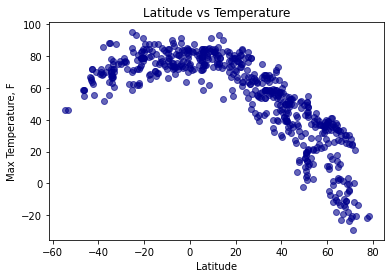

In [6]:
lat = city_df['Lat']
temp = city_df['Max Temp']
plt.scatter(lat,temp, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature, F')
plt.title('Latitude vs Temperature')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

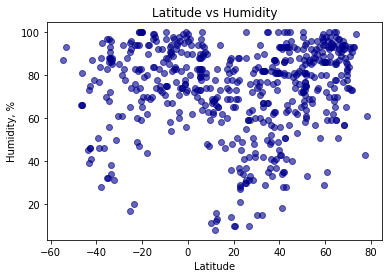

In [7]:
lat = city_df["Lat"]
hum = city_df['Humidity']
plt.scatter(lat,hum, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity, %')
plt.title('Latitude vs Humidity')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

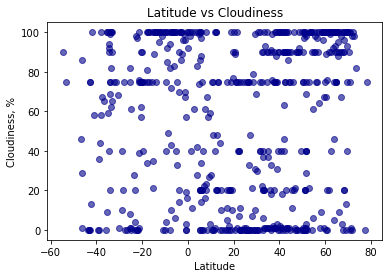

In [8]:
lat = city_df["Lat"]
clds = city_df['Cloudiness']
plt.scatter(lat,clds, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness, %')
plt.title('Latitude vs Cloudiness')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

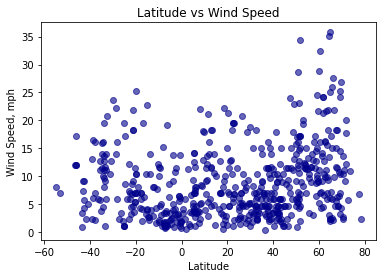

In [9]:
lat = city_df["Lat"]
wspd = city_df['Wind Speed']
plt.scatter(lat,wspd, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, mph')
plt.title('Latitude vs Wind Speed')
plt.show

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy import stats
def linreg(x_values,y_values):
    #The ‘linregress’ outputs 5 items (slope, intercept, rvalue, pvalue, stderr)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
Ncity = city_df.loc[city_df['Lat']>=0,:]
Scity = city_df.loc[city_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.873257502898138


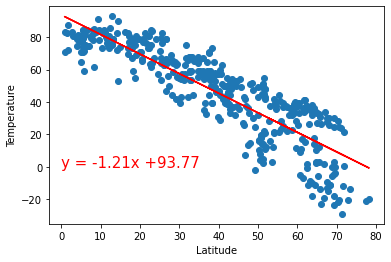

In [12]:
nLat = Ncity['Lat']
nTemp = Ncity['Max Temp']
linreg(nLat,nTemp)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5156700689892281


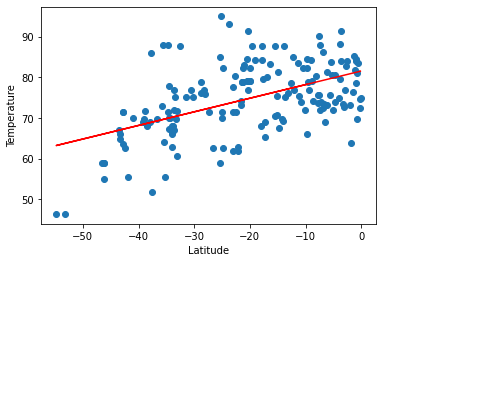

In [13]:
sLat = Scity['Lat']
sTemp = Scity['Max Temp']
linreg(sLat,sTemp)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26850072228040905


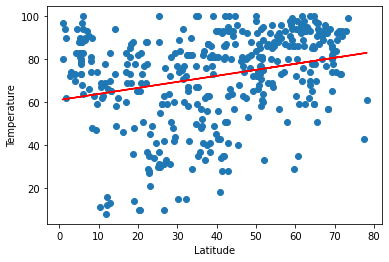

In [14]:
nLat = Ncity['Lat']
nHum = Ncity['Humidity']
linreg(nLat,nHum)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30931735927220017


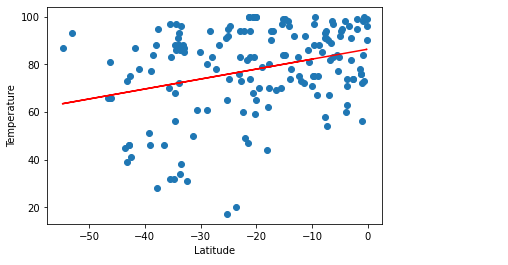

In [15]:
sLat = Scity['Lat']
sHum = Scity['Humidity']
linreg(sLat,sHum)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28066801914855377


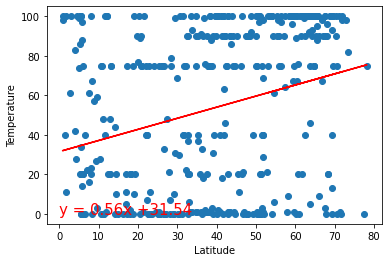

In [16]:
nLat = Ncity['Lat']
nCld = Ncity['Cloudiness']
linreg(nLat,nCld)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.190539421232183


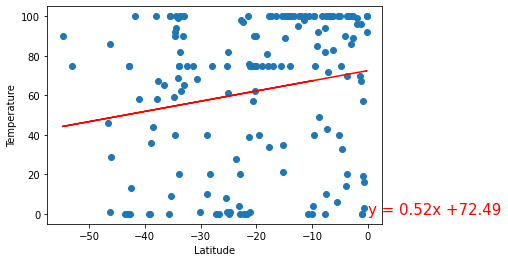

In [17]:
sLat = Scity['Lat']
sCld = Scity['Cloudiness']
linreg(sLat,sCld)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2865853912847698


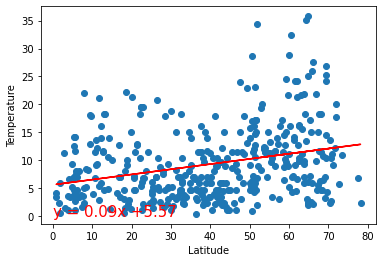

In [18]:
nLat = Ncity['Lat']
nSpd = Ncity['Wind Speed']
linreg(nLat,nSpd)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3207218730004692


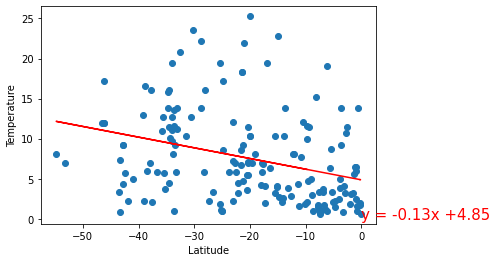

In [19]:
sLat = Scity['Lat']
sSpd = Scity['Wind Speed']
linreg(sLat,sSpd)